In [1]:
%tensorflow_version 1.x
import tensorflow
import numpy as np
import io
import matplotlib.pyplot as plt

TensorFlow 1.x selected.


In [2]:
print(tensorflow.__version__)

1.15.2


In [0]:
csv_file_path = '/content/drive/My Drive/Colab Notebooks/data/_hg/label_image_map.csv'
label_file = '/content/drive/My Drive/Colab Notebooks/data/_hg/label.txt'

csv_file = io.open(csv_file_path , 'r', encoding = 'utf8')
labels_file = io.open(label_file, 'r', encoding = 'utf8').read().splitlines() ## for 문 돌리기위해서 다음과 같이. (label_dict 생성을 위함)

In [0]:
label_dict = {}
count = 0
for label in labels_file:
    label_dict[label.strip()] = count
    count += 1

In [5]:
label_dict

{'가': 0,
 '각': 1,
 '간': 2,
 '갇': 3,
 '갈': 4,
 '감': 5,
 '갑': 6,
 '값': 7,
 '갓': 8,
 '강': 9,
 '갖': 10,
 '같': 11,
 '갚': 12,
 '갛': 13,
 '개': 14,
 '객': 15,
 '걀': 16,
 '걔': 17,
 '거': 18,
 '걱': 19,
 '건': 20,
 '걷': 21,
 '걸': 22,
 '검': 23,
 '겁': 24,
 '것': 25,
 '겉': 26,
 '게': 27,
 '겨': 28,
 '격': 29,
 '겪': 30,
 '견': 31,
 '결': 32,
 '겹': 33,
 '경': 34,
 '곁': 35,
 '계': 36,
 '고': 37,
 '곡': 38,
 '곤': 39,
 '곧': 40,
 '골': 41,
 '곰': 42,
 '곱': 43,
 '곳': 44,
 '공': 45,
 '과': 46,
 '관': 47,
 '광': 48,
 '괜': 49,
 '괴': 50,
 '굉': 51,
 '교': 52,
 '구': 53,
 '국': 54,
 '군': 55,
 '굳': 56,
 '굴': 57,
 '굵': 58,
 '굶': 59,
 '굽': 60,
 '궁': 61,
 '권': 62,
 '귀': 63,
 '귓': 64,
 '규': 65,
 '균': 66,
 '귤': 67,
 '그': 68,
 '극': 69,
 '근': 70,
 '글': 71,
 '긁': 72,
 '금': 73,
 '급': 74,
 '긋': 75,
 '긍': 76,
 '기': 77,
 '긴': 78,
 '길': 79,
 '김': 80,
 '깅': 81,
 '깊': 82,
 '까': 83,
 '깍': 84,
 '깎': 85,
 '깐': 86,
 '깔': 87,
 '깜': 88,
 '깝': 89,
 '깡': 90,
 '깥': 91,
 '깨': 92,
 '꺼': 93,
 '꺾': 94,
 '껌': 95,
 '껍': 96,
 '껏': 97,
 '껑': 98,
 '께': 99,
 '껴': 100,

In [0]:
X = np.load('/content/drive/My Drive/Colab Notebooks/data/_hg/X_data.npy')
y = np.load('/content/drive/My Drive/Colab Notebooks/data/_hg/y_data.npy')

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, stratify = y)

In [8]:
from keras.models import load_model
# model = load_model('/content/drive/My Drive/Colab Notebooks/data/_hg/font_model2.hdf5')

Using TensorFlow backend.







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




In [9]:
model.predict(X[0].reshape(-1,32,32,3)).argmax()

886

In [0]:
!pip install shap

In [0]:
import shap
explainer = shap.GradientExplainer(model, X_train)

In [0]:
X_train.shape, X_val[:3].shape

((36848, 32, 32, 3), (3, 32, 32, 3))

In [0]:
model.predict(X_val[:3])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
shap_values = explainer.shap_values(X_val[:3])

In [7]:
import tensorflow.keras.utils as utils

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Convolution2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


batch_size = 128
epochs = 300
num_classes = 980

y_train = utils.to_categorical(y_train, num_classes)
y_val = utils.to_categorical(y_val, num_classes)

cb_early_stopping = EarlyStopping(monitor='val_loss', patience=50)

train_generator = ImageDataGenerator(rescale=1./255, 
                                     rotation_range=15, 
                                     width_shift_range=0.15, 
                                     height_shift_range=0.15, 
                                     shear_range=0.2, 
                                     zoom_range=[0.8, 1.2])

val_generator = ImageDataGenerator(rescale=1./255)

train_data_flow = train_generator.flow(X_train, y_train, 
                                       batch_size=batch_size)
val_data_flow = val_generator.flow(X_val, y_val,
                                   batch_size=batch_size)

img_rows, img_cols = 32, 32
input_shape = (img_rows, img_cols, 3)

model = Sequential()
model.add(Convolution2D(32, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Convolution2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.50))

model.add(Convolution2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [8]:
  
RMSprop = tensorflow.keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
                   
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop,
              metrics=['accuracy'])

hist = model.fit_generator(train_data_flow,
                           epochs=epochs,
                           verbose=1,
                           steps_per_epoch = 230,
                           validation_data=val_data_flow,
                           validation_steps = 70,
                           callbacks=[cb_early_stopping])

Epoch 1/300
230/230 [==============================] - 22s 94ms/step - loss: 6.8900 - acc: 7.8167e-04 - val_loss: 6.8877 - val_acc: 8.9286e-04
Epoch 2/300
230/230 [==============================] - 19s 84ms/step - loss: 6.8893 - acc: 7.1332e-04 - val_loss: 6.8878 - val_acc: 0.0010
Epoch 3/300
230/230 [==============================] - 20s 87ms/step - loss: 6.8895 - acc: 7.8167e-04 - val_loss: 6.8879 - val_acc: 0.0010
Epoch 4/300
230/230 [==============================] - 19s 84ms/step - loss: 6.8869 - acc: 5.4377e-04 - val_loss: 6.8449 - val_acc: 0.0029
Epoch 5/300
230/230 [==============================] - 19s 83ms/step - loss: 6.5974 - acc: 0.0037 - val_loss: 5.7356 - val_acc: 0.0223
Epoch 6/300
230/230 [==============================] - 20s 86ms/step - loss: 5.9399 - acc: 0.0145 - val_loss: 4.6669 - val_acc: 0.0891
Epoch 7/300
230/230 [==============================] - 19s 84ms/step - loss: 5.1679 - acc: 0.0428 - val_loss: 3.5808 - val_acc: 0.2003
Epoch 8/300
230/230 [==============

In [9]:
!pip install shap

     |████████████████████████████████| 276kB 1.4MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394109 sha256=30a11a4ed05132292afe80e6aba63986f3583caf9c131c520d2418e877c24ca8
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap


In [0]:
model.save('/content/drive/My Drive/Colab Notebooks/data/_hg/newmodel.hdf5')

In [13]:
import shap
explainer = shap.GradientExplainer(model, [X_train])

Using TensorFlow backend.


In [35]:
y_val[0].argmax()

52

In [0]:
model.predict()

In [0]:
shap_values = explainer.shap_values(X_val[0].reshape(-1,32,32,3)) 

In [75]:
y_val[152].argmax()

705

In [89]:
model.predict(X_val[0].reshape(-1,32,32,3)).argmax()

498

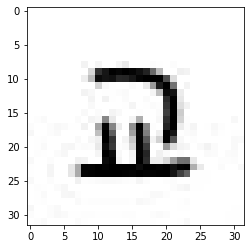

In [86]:
plt.imshow(X_val[0])

In [93]:
a =model.predict(X_val[0].reshape(-1,32,32,3))

array([1.], dtype=float32)

아래에서 inputshape를 reshape해주니 결과가 출력 되었음



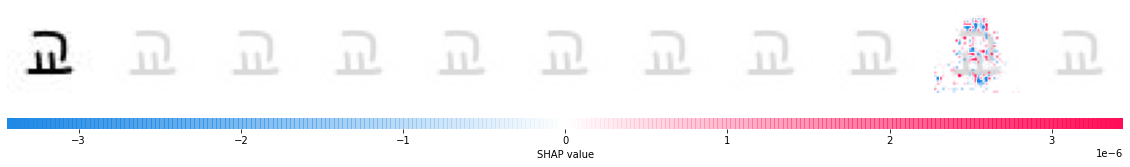

In [90]:
shap.image_plot([shap_values[i] for i in range(490, 500)], X_val[0].reshape(1,32,32,3).astype("float32"))

In [52]:
np.array(shap_values[0][0]).shape

(32, 32, 3)

In [61]:
X_val[0].shape

(32, 32, 3)

In [51]:
shap_values[52][0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])